In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# def plot_lines(file_list, x_label_ = "", y_label_ ="", title="", savefig_name="default.pdf"):
#     for array in file_list:
#         plt.plot(array, '--')
#     plt.ylim(-0.05,1.05)
#     #     ax = plt.gca() # gets the active axis
#     #     ax.set_aspect(1)
#     plt.xlabel(x_label_)
#     plt.ylabel(y_label_)
#     plt.title(title)
#     plt.savefig(savefig_name)
#     plt.clf()


def plot_lines(file_list, x_label="", y_label="", title="", savefig_name="default.pdf"):
    # Check if the length of file_list is greater than or equal to 3
    if len(file_list) >= 3:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

        # Plot the first three elements in the subplots
        for i in range(3):
            axes[i].plot(file_list[i], '--')
            axes[i].set_ylim(-0.05, 1.05)
            axes[i].set_xlabel(x_label)
            axes[i].set_ylabel(y_label)
            axes[i].set_title(title + f" - Subplot {i+1}")

        plt.tight_layout()  # Adjust layout for better spacing
        plt.savefig(f"all_{savefig_name}")
        plt.close(fig)  # Close the figure to release resources
    else:
        # Plot all elements in a single plot
        for array in file_list:
            plt.plot(array, '--')
        plt.ylim(-0.05, 1.05)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.savefig(savefig_name)
        plt.clf()


/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

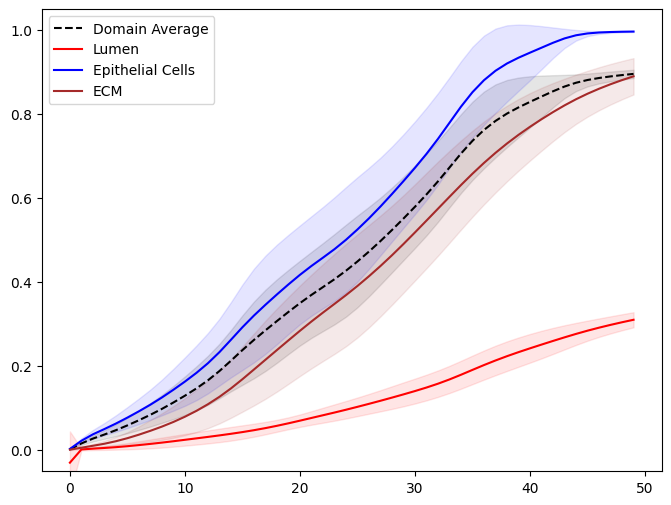

In [3]:

# row_stats_mat1 = df.agg(['min', 'max', 'median'], axis=1)
# row_medians = df.median(axis=1)

# plt.plot(row_stats['median'])
# plt.plot(row_stats['min'])
# plt.plot(row_stats['max'])
N = 6
CryptNum = 0
name = [f"crypt{CryptNum}_test", f"crypt{CryptNum}_test", f"crypt{CryptNum}_test", f"crypt{CryptNum}_test"]
loadtype = ["overall", "mat1", "mat2", "mat3"]
OVERALL  = [np.load(f"norm-overall/{name[0]}{i}_{loadtype[0]}.npy") for i in range(N)]
MAT1     = [np.load(f"norm-mat1/{name[1]}{i}_{loadtype[1]}.npy") for i in range(N)]
MAT2     = [np.load(f"norm-mat2/{name[2]}{i}_{loadtype[2]}.npy") for i in range(N)]
MAT3     = [np.load(f"norm-mat3/{name[3]}{i}_{loadtype[3]}.npy") for i in range(N)]
# MAT1[0][0] = 1.85867921e-04

combined = [OVERALL, MAT1, MAT2, MAT3]
i = 0
for plot in combined:
    plot_lines(plot, savefig_name = f"crypt{CryptNum}_{loadtype[i]}.pdf")
    i+=1


d_all  = {f'col{i}': array for i, array in enumerate(OVERALL)}
d_mat1 = {f'col{i}': array for i, array in enumerate(MAT1)}
d_mat2 = {f'col{i}': array for i, array in enumerate(MAT2)}
d_mat3 = {f'col{i}': array for i, array in enumerate(MAT3)}

df_all = pd.DataFrame(data=d_all)
df_mat1 = pd.DataFrame(data=d_mat1)
df_mat2 = pd.DataFrame(data=d_mat2)
df_mat3 = pd.DataFrame(data=d_mat3)
df_mat3['col2'][0] = 0.000612
#df_mat3['col4'][0] = 0.002508
allstat = [np.mean(df_all, axis=1), np.mean(df_all, axis=1) - np.std(df_all, axis=1), np.mean(df_all, axis=1) + np.std(df_all, axis=1)]
mat1stat = [np.mean(df_mat1, axis=1), np.mean(df_mat1, axis=1) - np.std(df_mat1, axis=1), np.mean(df_mat1, axis=1) + np.std(df_mat1, axis=1)]
mat2stat = [np.mean(df_mat2, axis=1), np.mean(df_mat2, axis=1) - np.std(df_mat2, axis=1), np.mean(df_mat2, axis=1) + np.std(df_mat2, axis=1)]
mat3stat = [np.mean(df_mat3, axis=1), np.mean(df_mat3, axis=1) - np.std(df_mat3, axis=1), np.mean(df_mat3, axis=1) + np.std(df_mat3, axis=1)]


# mat2stat = [np.median(df_mat2, axis=1), np.min(df_mat2, axis=1), np.max(df_mat2, axis=1)]
# mat3stat = [np.median(df_mat3, axis=1), np.min(df_mat3, axis=1), np.max(df_mat3, axis=1)]

# mat3stat[1][0] = 0.0035
# mat1stat[1][0] = 0.00037

# mat1_medians = np.median(df, axis=1)
# mat1_mins = np.min(df, axis=1)
# mat2_maxs = np.max(df, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(range(len(allstat[0])), allstat[0],'--' ,color='black', label="Domain Average")
plt.fill_between(range(len(allstat[1])), allstat[1], allstat[2], color='black', alpha=0.1)

sns.lineplot(x=range(len(mat1stat[0])), y=mat1stat[0], color='red', label = "Lumen")
plt.fill_between(range(len(mat1stat[1])), mat1stat[1], mat1stat[2], color='red', alpha=0.1)


sns.lineplot(x=range(len(mat2stat[0])), y=mat2stat[0], color='blue', label = "Epithelial Cells")
plt.fill_between(range(len(mat2stat[1])), mat2stat[1], mat2stat[2], color='blue', alpha=0.1)

sns.lineplot(x=range(len(mat3stat[0])), y=mat3stat[0], color='brown', label = "ECM")
plt.fill_between(range(len(mat3stat[1])), mat3stat[1], mat3stat[2], color='brown', alpha=0.1)
plt.ylim(-0.05,1.05)

# plt.xlabel('Rows')
# plt.ylabel('Values')

plt.legend()
plt.show()

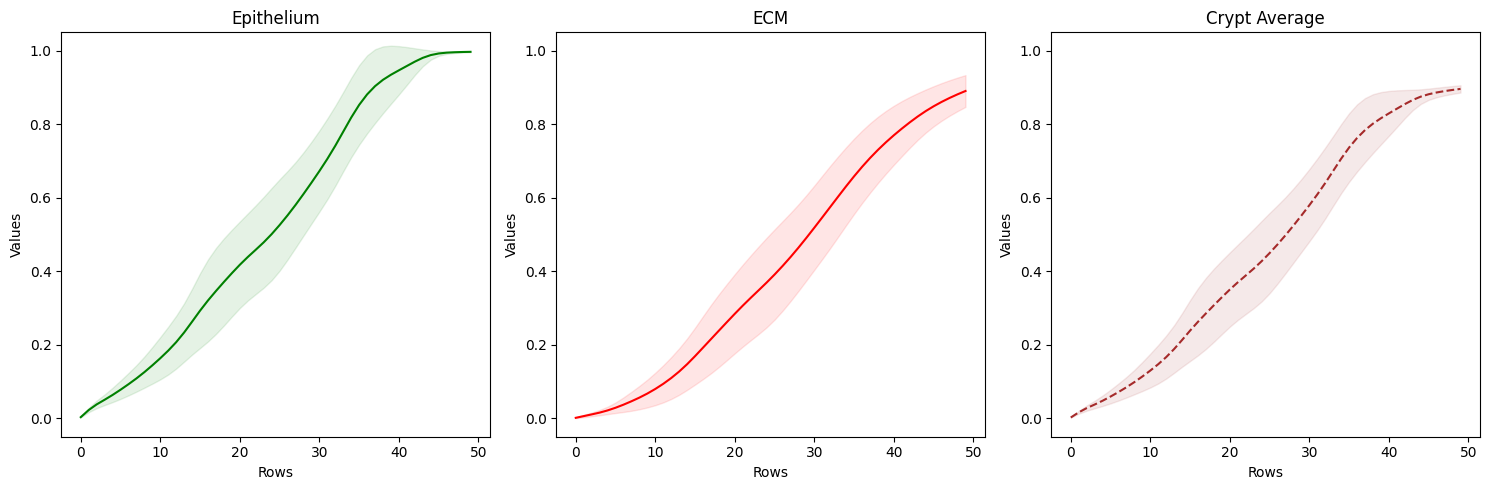

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(range(len(mat2stat[0])), mat2stat[0], color='green', label="Epithelial Cells")
axs[0].fill_between(range(len(mat2stat[1])), mat2stat[1], mat2stat[2], color='green', alpha=0.1)
axs[0].set_title('Epithelium')


axs[1].plot(range(len(mat3stat[0])), mat3stat[0], color='red', label="ECM")
axs[1].fill_between(range(len(mat3stat[1])), mat3stat[1], mat3stat[2], color='red', alpha=0.1)
axs[1].set_title('ECM')


# Plot for allstat
axs[2].plot(range(len(allstat[0])), allstat[0], '--', color='brown', label="Domain Average")
axs[2].fill_between(range(len(allstat[1])), allstat[1], allstat[2], color='brown', alpha=0.1)
axs[2].set_title('Crypt Average')

# Plot for mat1stat
# Plot for mat2stat


for ax in axs:
    ax.set_ylim(-0.05, 1.05)
    #ax.legend()
    ax.set_xlabel('Rows')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.savefig("crypt0.pdf")
plt.show()

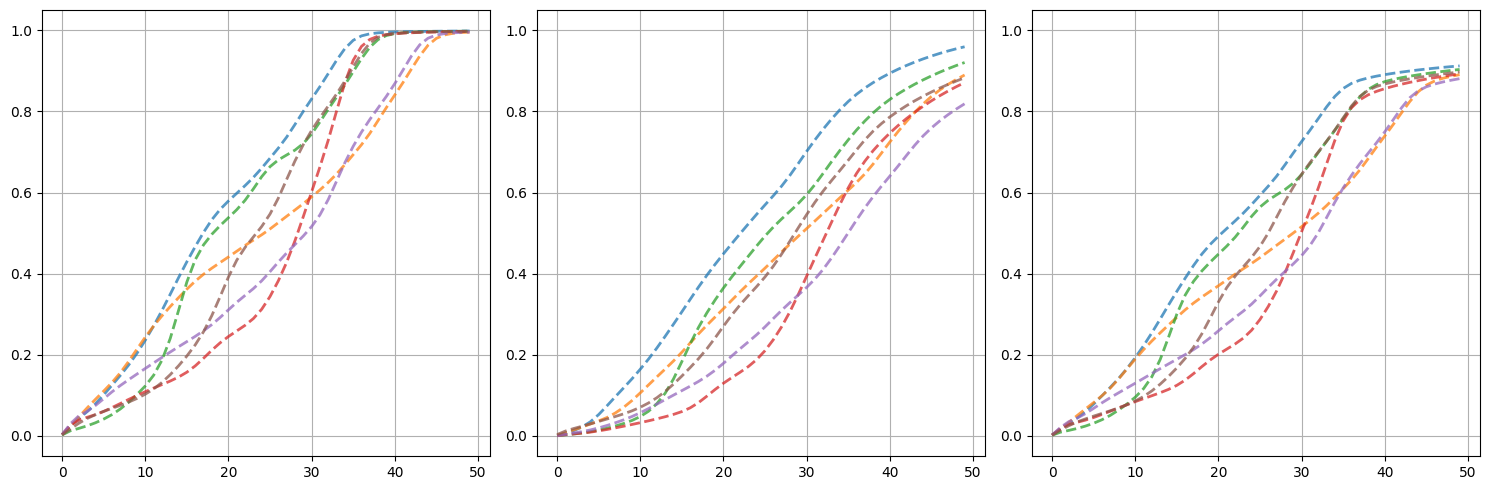

In [5]:
plt.style.use("default")
def plot_dashed_subfigures(epi, ecm, overall, linewidth=2, style="--", savefig_name="crypt1_dashed_default.pdf"):
    # Create a 1x3 subfigure
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    # Plot each DataFrame in a separate subplot
    epi.plot(style=style, legend=False, linewidth=linewidth, grid=True, ax=axes[0],alpha = 0.75)
    ecm.plot(style=style, legend=False, linewidth=linewidth, grid=True, ax=axes[1], alpha = 0.75)
    overall.plot(style=style, legend=False, linewidth=linewidth, grid=True, ax=axes[2], alpha = 0.75)

    # Set common labels and title
    for ax in axes:
        ax.set_ylim(-0.05, 1.05)
        #ax.set_xlabel("X-axis Label")
        #ax.set_ylabel("Y-axis Label")
    
    # Optional: set a common title for the subfigures
    #plt.suptitle("Subfigures Title", fontsize=16)
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.savefig(savefig_name)
    plt.show()

plot_dashed_subfigures(df_mat2, df_mat3, df_all, linewidth=2)

In [10]:
df_mat1.to_csv("gaussdist_crypt1mat1.csv", index=False)
df_mat2.to_csv("gaussdist_crypt1mat2.csv", index=False)
df_mat3.to_csv("gaussdist_crypt1mat3.csv", index=False)
df_all.to_csv("gaussdist_crypt1all.csv", index=False)

In [7]:
df_mat2_heaviside = pd.read_csv("crypt1_mat2_heaviside.csv")

In [8]:
df_mat2_heaviside = df_mat2_heaviside.drop(['Unnamed: 0'], axis=1)

In [9]:
df_mat2_heaviside

,col0,col1,col2,col3,col4,col5
0,0.002004,0.001773,0.001557,0.002175,0.002249,0.002220
1,0.023226,0.022596,0.012296,0.025303,0.028322,0.016660
2,0.042279,0.046336,0.018562,0.038699,0.049338,0.031255
3,0.060103,0.069554,0.025085,0.046340,0.061452,0.043502
4,0.080112,0.091313,0.032839,0.053154,0.076310,0.053006
5,0.102833,0.111957,0.042058,0.061288,0.093221,0.061156
6,0.126617,0.133155,0.053182,0.070695,0.109962,0.068601
7,0.150695,0.157079,0.067017,0.080650,0.125300,0.075954
8,0.176553,0.184946,0.083819,0.090563,0.139542,0.083852
9,0.205658,0.215084,0.102623,0.100185,0.153355,0.092821


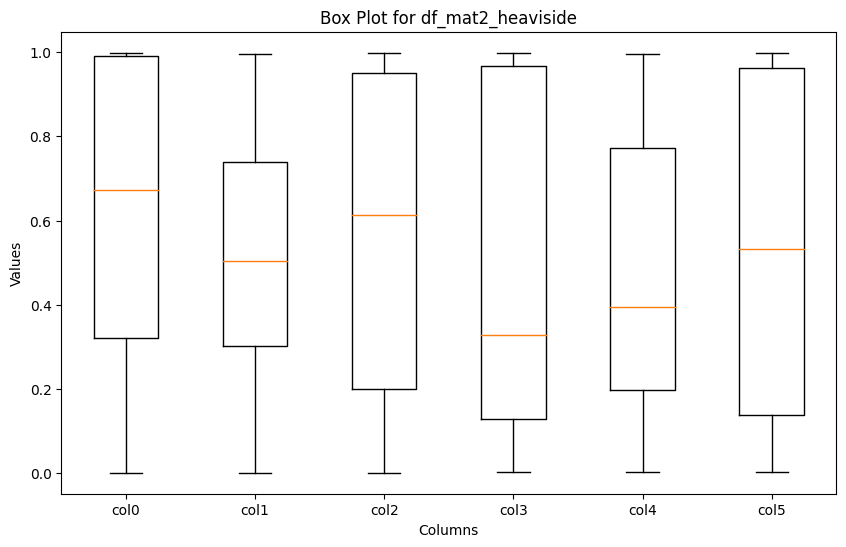

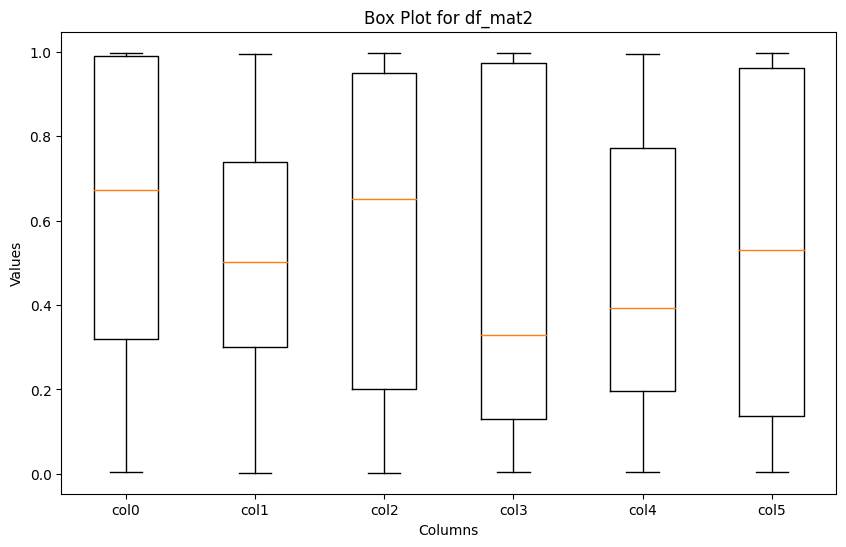

In [18]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_mat2_heaviside.values, labels=df_mat2_heaviside.columns)
plt.title('Box Plot for df_mat2_heaviside')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Plotting box plot for df_mat2
plt.figure(figsize=(10, 6))
plt.boxplot(df_mat2.values, labels=df_mat2.columns)
plt.title('Box Plot for df_mat2')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

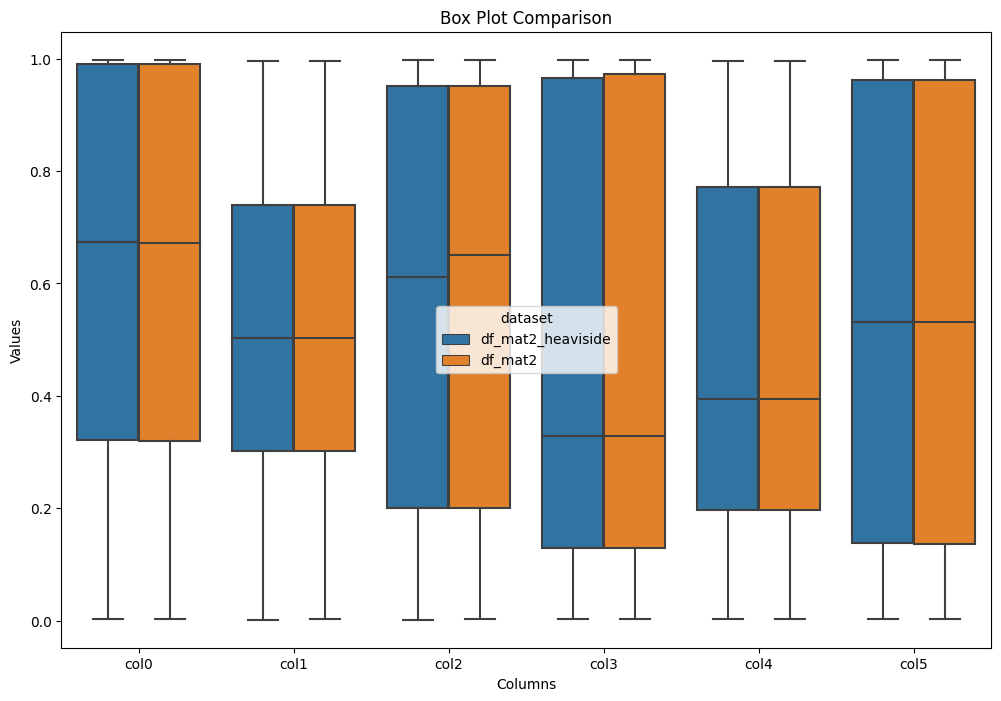

In [22]:
concatenated_df = pd.concat([df_mat2_heaviside.assign(dataset='df_mat2_heaviside'),
                             df_mat2.assign(dataset='df_mat2')])

# Use Seaborn to create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='dataset', data=pd.melt(concatenated_df, id_vars=['dataset']))
plt.title('Box Plot Comparison')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/purusharth/.envs/base/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

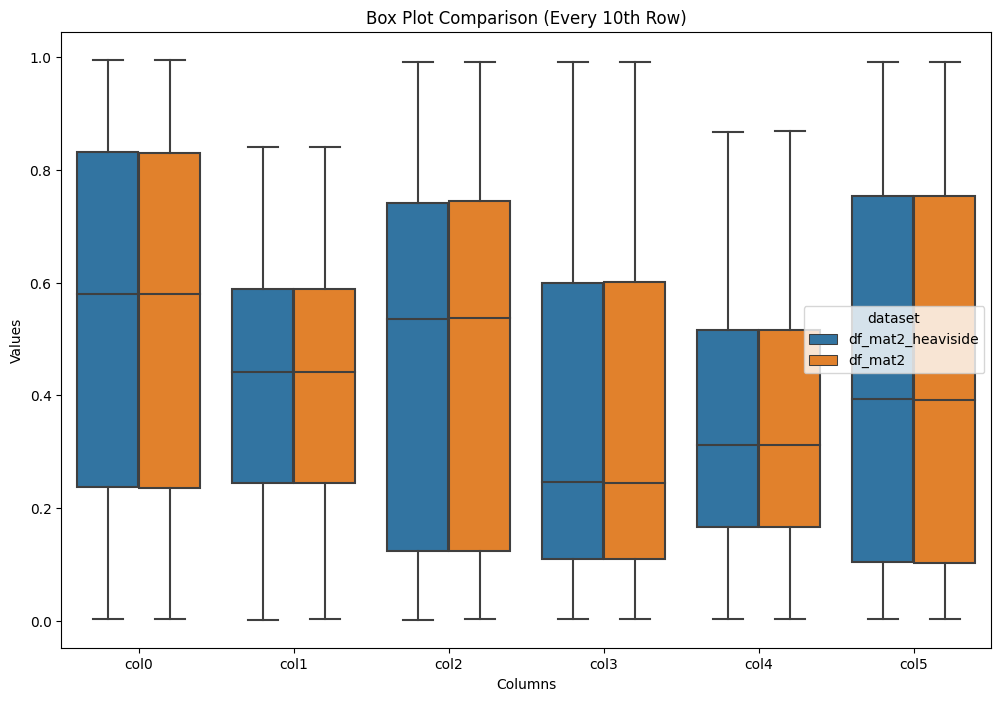

In [23]:
# Extract every 10th row
df_mat2_heaviside_sampled = df_mat2_heaviside.iloc[::10, :]
df_mat2_sampled = df_mat2.iloc[::10, :]

# Concatenate the sampled dataframes
concatenated_df = pd.concat([df_mat2_heaviside_sampled.assign(dataset='df_mat2_heaviside'),
                             df_mat2_sampled.assign(dataset='df_mat2')])

# Use Seaborn to create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='dataset', data=pd.melt(concatenated_df, id_vars=['dataset']))
plt.title('Box Plot Comparison (Every 10th Row)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()